In [1]:
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df_ball=pd.read_csv("baseball.csv")

In [3]:
df_ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


W=Output
Regression Model.(Defination)

In [395]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [396]:
df_ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [397]:
df_ball.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [398]:
df_ball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [399]:
df_ball.shape

(30, 17)

### Data Visualisation:

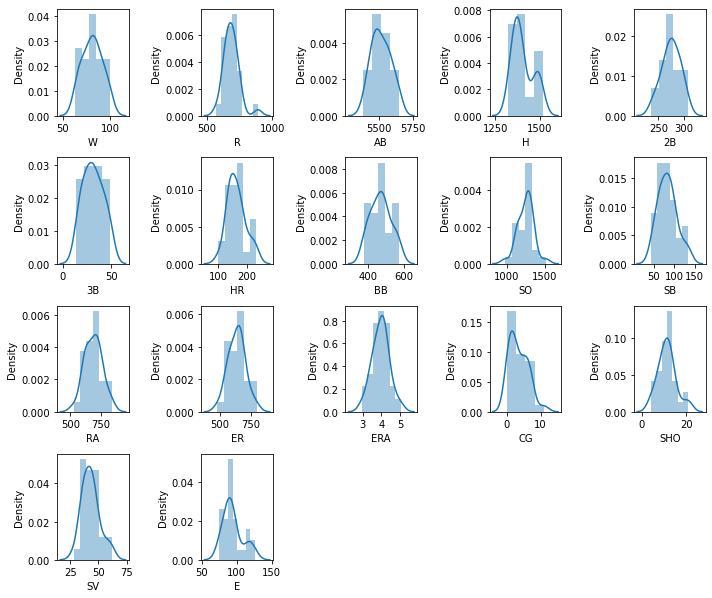

In [400]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_ball:
    if pltnumber<=17:
        ax = plt.subplot(5,5,pltnumber)
        sns.distplot(df_ball[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

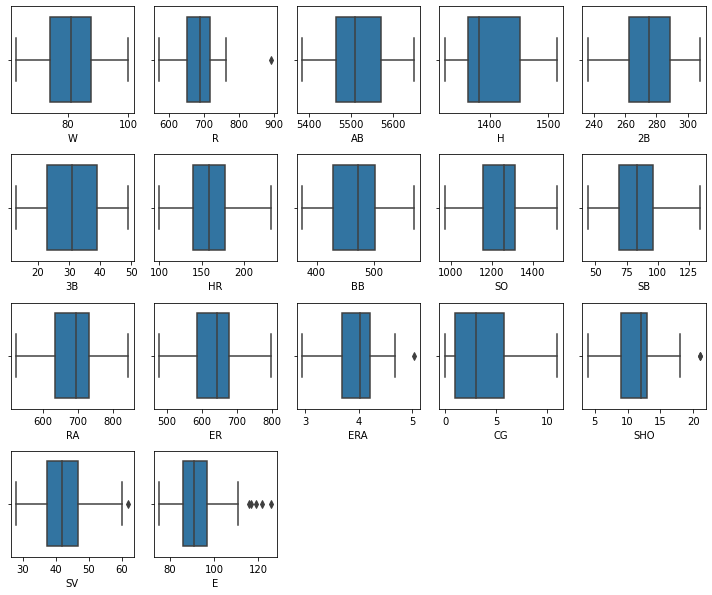

In [401]:
plt.figure(figsize=(10,10))
pltnumber=1
for column in df_ball:
    if pltnumber<=17:
        ax=plt.subplot(5,5,pltnumber)
        sns.boxplot(df_ball[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [403]:
from scipy.stats import zscore

z = np.abs(zscore(df_ball))
threshold = 3
df_ball1 = df_ball[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",df_ball.shape)
print("shape after" .ljust(20),":",df_ball1.shape)
print("% loss" .ljust(20),":",((df_ball.shape[0]-df_ball1.shape[0])/df_ball.shape[0])*100)

shape before and after
shape before         : (30, 17)
shape after          : (29, 17)
% loss               : 3.3333333333333335


In [404]:
df_ball1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [405]:
df_ball1[['H','E']]=df_ball1[['H','E']].apply(np.cbrt)

In [406]:
df_ball1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.671748
dtype: float64

In [412]:
from scipy.stats import boxcox
#o- Log transformation
#.5- Square root transformation
df_ball1['H']=boxcox(df_ball1['H'],0)

In [413]:
df_ball1['E']=boxcox(df_ball1['E'],0)

In [414]:
df_ball1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.724813
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.523739
dtype: float64

In [415]:
df_ball1['SV']=np.log(df_ball1['SV'])

In [416]:
df_ball1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.724813
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.096752
E      0.523739
dtype: float64

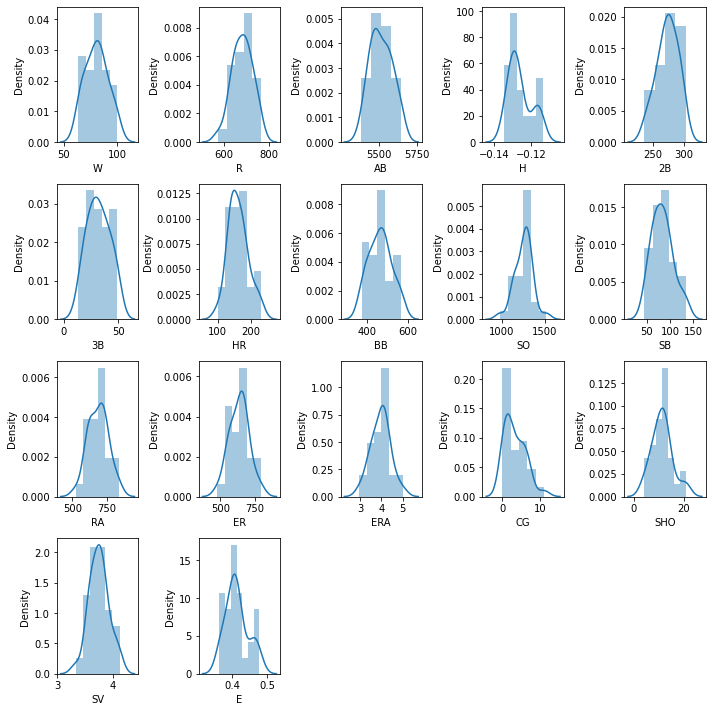

In [417]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_ball1:
    if pltnumber<=17:
        ax = plt.subplot(4,5,pltnumber)
        sns.distplot(df_ball1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

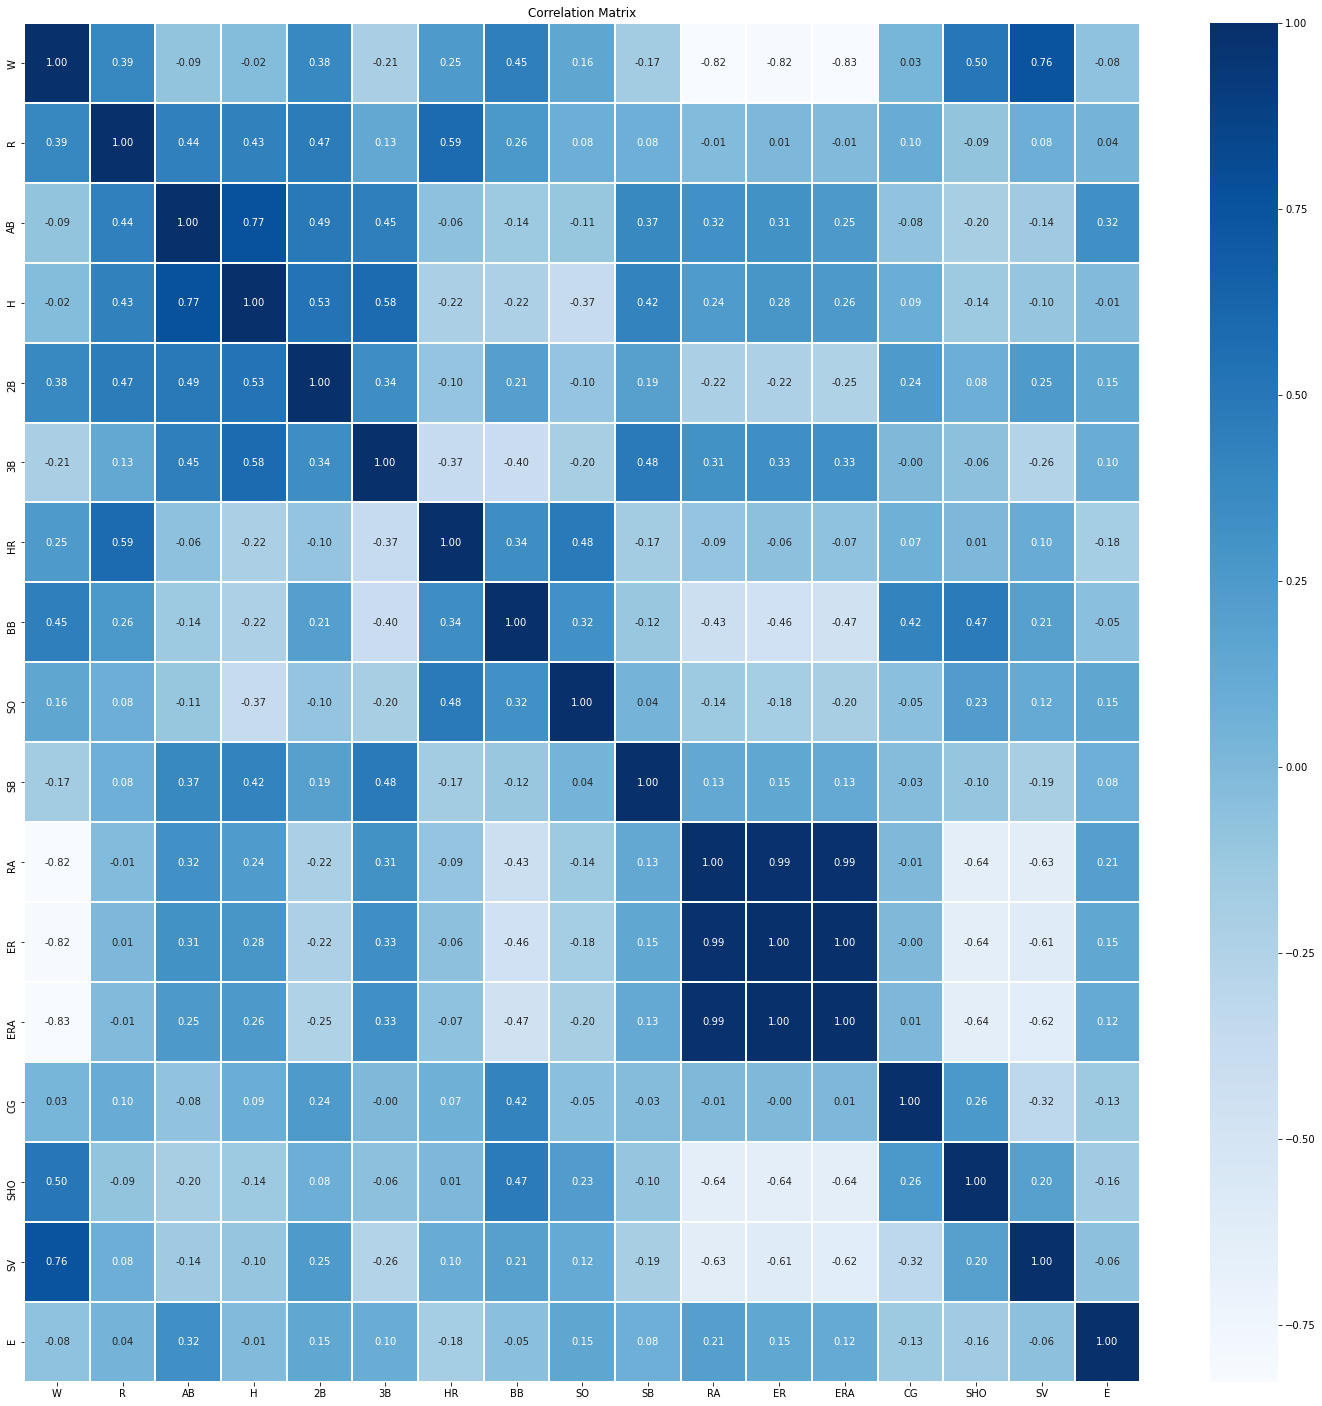

In [418]:
corr = df_ball1.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, cmap= 'Blues',annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix")
plt.show()


In [420]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Features']=df_ball1.columns
vif_data['VIF Values']=[variance_inflation_factor(df_ball1.values,i) for i in range(len(df_ball1.columns))]
print(vif_data)

   Features    VIF Values
0         W   1352.484631
1         R   3317.127174
2        AB   5928.072072
3         H   1753.809181
4        2B   1094.749413
5        3B     36.987956
6        HR    285.940738
7        BB    284.900703
8        SO    424.900615
9        SB     26.798978
10       RA  20017.412684
11       ER  76424.134856
12      ERA  42116.203852
13       CG      8.460906
14      SHO     32.385374
15       SV   4335.748982
16        E    334.085414


In [466]:
df_ball1=df_ball1.drop('ERA',axis=1)


In [467]:
df_ball1.shape

(29, 16)

In [468]:
df_ball1=df_ball1.sample(frac=1)

In [485]:
df_ball1.shape

(29, 16)

In [469]:
x=df_ball1.drop('W',axis=1)
y=df_ball1['W']

In [426]:
#PCA:
from sklearn.decomposition import PCA 
pca=PCA(n_components=1)
pca.fit(df_ba1)

PCA(n_components=1)

In [427]:
Pca_df_bal=pca.transform(df_ba1)

In [428]:
Pca_df_bal.shape

(29, 1)

In [476]:
x=df_ball1.drop('W',axis=1)

In [486]:
x.shape

(29, 15)

In [479]:
y=df_ball1['W']

In [487]:
y.shape

(29,)

In [478]:
df_ball1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [488]:
Scaler=StandardScaler()
x_scal=Scaler.fit_transform(x)

In [503]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=505)

In [504]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))
print("R2 Score", r2_score(y_test, y_pred))
cv_score1 = np.mean(cross_val_score(rf,x,y, cv = 5))  
print("random Forest", cv_score1)
print("Difference in Score",(r2_score(y_test, y_pred)-cv_score1)*100)

MSE 58.71748749999997
RMSE 7.662733683222977
Train Score 0.958206891460966
Test Score 0.132520960295476
R2 Score 0.132520960295476
random Forest 0.19905957408018107
Difference in Score -6.653861378470507


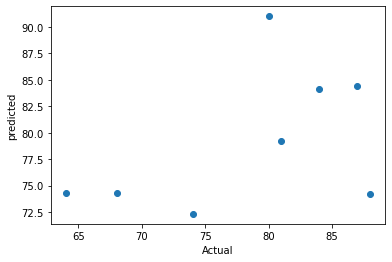

In [505]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [506]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Score", lr.score(x_train,y_train))
print("Test Score", lr.score(x_test,y_test))
cv_score2 = np.mean(cross_val_score(lr,x_scal,y, cv = 5)) 
print("Linear", cv_score2)
print("Difference in Score",abs(r2_score(y_test, y_pred)-cv_score2)*100)

MSE 77.89621888041263
RMSE 8.82588346175116
R2 Score -0.1508213315665763
Train Score 0.9900958564535468
Test Score -0.1508213315665763
Linear -0.38883919511674203
Difference in Score 23.801786355016574


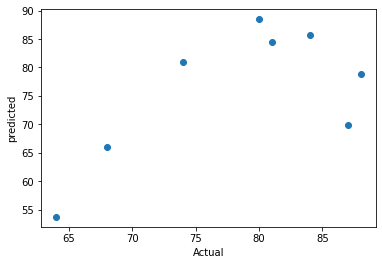

In [507]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [508]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , abr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  abr.score(x_test,y_test))
cv_score3 = np.mean(cross_val_score(abr,x_scal,y, cv = 5))  
print("Ada Boost", cv_score3)
print("Difference in Score",abs(r2_score(y_test, y_pred)-cv_score3)*100)

RMSE : 7.650344945019001
R2 Score 0.1353236893403097
Train Data score: 0.9949640202370902
Test On TrainDataSet score: 0.1353236893403097
Ada Boost 0.04505328283296008
Difference in Score 9.02704065073496


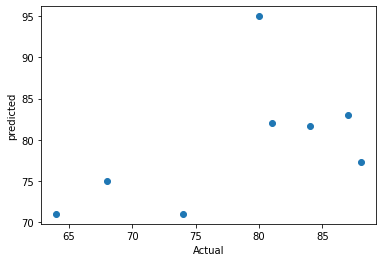

In [509]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [510]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))
cv_score4 = np.mean(cross_val_score(knr,x_scal,y, cv = 2)) 
print("KNR", cv_score4)
print("Difference in Score",abs(r2_score(y_test, y_pred)-cv_score4)*100)

r2_Score 0.2579870729455216
MSE 50.22500000000001
RMSE 7.0869598559608065
Train Score 0.6692051494035668
Test Score 0.2579870729455216
KNR 0.5959719801607275
Difference in Score 33.798490721520594


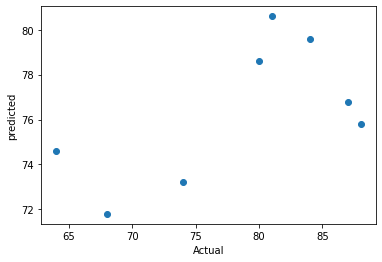

In [511]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

RandomForestRegressor is the final model:
    

In [356]:
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 
         'min_samples_split':[2], 'min_samples_leaf':[1],
      'max_features':['auto'], 'max_leaf_nodes':[3,6,9,12,15],'random_state':[555],
          'max_samples':[2,4,6,8,10,12,]
        }

In [357]:
gs = GridSearchCV(rf, param_grid = param, cv = 5)


In [358]:
gs.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto'],
                         'max_leaf_nodes': [3, 6, 9, 12, 15],
                         'max_samples': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [555]})

In [359]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 3,
 'max_samples': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 555}

In [377]:
model=RandomForestRegressor(criterion= 'mse',
                            max_depth=2,
                            max_features= 'auto',
                            max_leaf_nodes= 3,
                            max_samples= 10,
                            min_samples_leaf= 1,
                            min_samples_split=2,
                            n_estimators= 50,
                            random_state= 555)

model.fit(x_train,y_train)
Pred = model.predict(x_test)

print("r2_Score", r2_score(y_test,Pred))
print("MSE",metrics.mean_squared_error(y_test,Pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,Pred)))
print("Train Score", model.score(x_train,y_train))
print("Test Score", model.score(x_test,y_test))

r2_Score 0.474114072342645
MSE 88.87472177409299
RMSE 9.427339061161055
Train Score 0.7179198499326177
Test Score 0.474114072342645


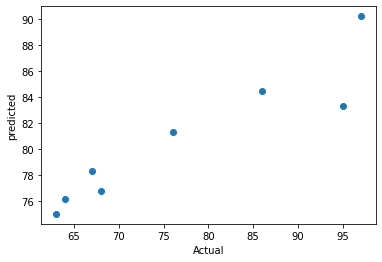

In [378]:
plt.scatter(y_test,Pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()